# Data-analyysin osaaja

# Koulutus: 21.11.-22.11.2019

# Aihe: Lineaarinen regressio

# Harjoitusesimerkki lineaarisesta regressiosta

Tässä harjoituksessa rakennamme kokonaisen analyysiketjun, jossa ladataan data jollain opitulla tavalla. Datasta valitaan halutut muuttujat, ja tehdään ennustin. Ennustimen tarkkuus mitataan huolellisesti ristiinvalidoimalla.

Ensin tarvitaan kuitenkin tavalliset kirjastot, josta saamme tietorakenteita ja funktiota käyttöön:

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Mieti millaisen ennustusongelman haluat ratkaista ja lataa siihen liittyvä data

Voit tutustua halutessasi Scikit-learn -kirastossa oleviin datajoukkoihin: https://scikit-learn.org/stable/datasets/index.html#

In [4]:
# Voit korvata seuraavan haluamallasi datalla:

matkat = pd.read_csv("ajetut_matkat.csv")

Katsotaan datan ominaisuuksia:

In [5]:
matkat

,Matka,etaisyys,kulutus
0,Espoo-Turku,134,10.80
1,Espoo-Turku,145,12.40
2,Espoo-Pori,211,16.50
3,Espoo-Jyvaskyla,234,22.10
4,Espoo-Helsnki,16,1.21
5,Espoo-Helsinki,21,1.93
6,Espoo-Tampere,152,14.20
7,Espoo-Lahti,103,9.26
8,Espoo-Vantaa,27,2.54
9,Espoo-Lohja,41,3.10


In [6]:
matkat.head()

,Matka,etaisyys,kulutus
0,Espoo-Turku,134,10.80
1,Espoo-Turku,145,12.40
2,Espoo-Pori,211,16.50
3,Espoo-Jyvaskyla,234,22.10
4,Espoo-Helsnki,16,1.21


In [7]:
matkat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Matka       10 non-null object
etaisyys    10 non-null int64
kulutus     10 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


In [8]:
matkat.describe()

,etaisyys,kulutus
count,10.000000,10.000000
mean,108.400000,9.404000
std,79.980831,7.112946
min,16.000000,1.210000
25%,30.500000,2.680000
50%,118.500000,10.030000
75%,150.250000,13.750000
max,234.000000,22.100000


In [9]:
matkat.columns

Index(['Matka', 'etaisyys', 'kulutus'], dtype='object')

# Poimi x ja y muuttujat:

Poimitaan Datasta etaisyys ja kulutus omiksi muuttujikseen

In [10]:
x = matkat['etaisyys']

In [11]:
y = matkat['kulutus']

Joskus datan tyyppiä täytyy muokata, jos se on esim. kokonaislukuina

In [12]:
x_f = x.astype(float)

In [13]:
y_f = y.astype(float)

Käytetään Matplotlib-kirjastoa kuvien piirtämiseen

In [14]:
import matplotlib.pyplot as plt

Piirretään opetusdata x-y -koordinaatistoon

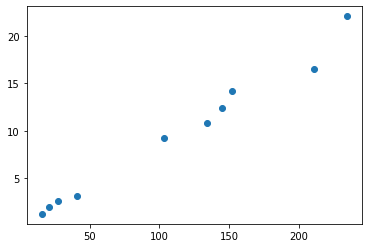

In [15]:
plt.scatter(x,y)

Käytetään kirjastoa scikit-learn:

In [16]:
from sklearn.linear_model import LinearRegression

# Opeta lineaarinen malli datasta

In [17]:
lm = LinearRegression(fit_intercept=True)

In [18]:
x_f.shape

(10,)

In [19]:
y_f.shape

(10,)

In [20]:
y

0    10.80
1    12.40
2    16.50
3    22.10
4     1.21
5     1.93
6    14.20
7     9.26
8     2.54
9     3.10
Name: kulutus, dtype: float64

In [21]:
y.values

array([10.8 , 12.4 , 16.5 , 22.1 ,  1.21,  1.93, 14.2 ,  9.26,  2.54,
        3.1 ])

In [22]:
y_f

0    10.80
1    12.40
2    16.50
3    22.10
4     1.21
5     1.93
6    14.20
7     9.26
8     2.54
9     3.10
Name: kulutus, dtype: float64

In [23]:
data_x = pd.DataFrame(x_f)

In [24]:
data_y = pd.DataFrame(y_f)

# Jaa data opetusjoukkoon ja validointijoukkoon:

Opetetaan malli opetusdatasta, jätä toistaiseksi validointidata käyttämättä:

In [25]:
data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
...     data_x, data_y, test_size=0.2, random_state=0)

In [26]:
# Lineaarinen malli sovitetaan opetusdataan:

lm.fit(data_x_opetus,data_y_opetus)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lm.coef_

array([[0.09376095]])

# Laske mallin opetusvirhe ja validointivirhe

Käytetään mallia ennustamaan kulutusta ajettujen kilometrien perusteella:

In [ ]:
# Lasketaan lineaarisella mallilla ennustukset arvoille 0, 10, 20, ..
predictions = lm.predict(np.arange(0,250,10).reshape(-1,1))

In [ ]:
# Lasketaan ennustusten opetusvirhe (MSE = mean squared error eli keskimääräinen neliövirhe)
ennustukset_opetus = lm.predict(data_x_opetus)
opetus_mse = mean_squared_error(data_y_opetus, ennustukset_opetus)
opetus_mse

In [ ]:
# Lasketaan ennustusten validointivirhe
ennustukset_validointi = lm.predict(data_x_validointi)
validointi_mse = mean_squared_error(data_y_validointi, ennustukset_validointi)
validointi_mse

In [ ]:
plt.plot(np.arange(0,250,10),predictions,'-')
plt.scatter(data_x,data_y)

Nyt harjoitellaan ristiinvaidointia, jossa data jaetaan opetusjoukkoon ja validointijoukkoon monta kertaa. Kullekin jaolle opetetaan malli opetusdatalla ja mallille lasketaan sekä opetusvirhe että validointivirhe.

In [ ]:
# Opetusvirheet tallennetaan taulukkoon:
opetus_mse = np.zeros(10)
opetus_r2 = np.zeros(10)

# Validointivirheet tallenetaan taulukkoon:
validointi_mse = np.zeros(10)
validointi_r2 = np.zeros(10)

# Toista jako opetus- ja validointidataan 10 kertaa, opeta
# joka kerta uusi malli, jolle lasket opetusvirheen (opetusdatan
# avulla) ja validointivirheen(validointidatan avulla)

for i in np.arange(0,10):
  data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(data_x, data_y, test_size=0.2, random_state=689*i)

  # Opetetaan malli tällä nimenomaisella jaolla!
  lm.fit(data_x_opetus,data_y_opetus)

  # Lasketaan ennustusten opetusvirhe (MSE ja R2):
  ennustukset_opetus = lm.predict(data_x_opetus)
  opetus_mse[i] = mean_squared_error(data_y_opetus, ennustukset_opetus)
  opetus_r2[i] = r2_score(data_y_opetus, ennustukset_opetus)

  # Lasketaan ennustusten validointivirhe (MSE ja R2):
  ennustukset_validointi = lm.predict(data_x_validointi)
  validointi_mse[i] = mean_squared_error(data_y_validointi, ennustukset_validointi)
  validointi_r2[i] = r2_score(data_y_validointi, ennustukset_validointi)

In [ ]:
# 10 toistoa, 10 virhettä (MSE):
print(opetus_mse)

In [ ]:
# Yleensä raportoidaan toistettujen mallinnusten keskimääräinen virhe:
print(np.mean(opetus_mse))

In [ ]:
# Kymmenen toistoa, 10 virhettä (MSE)
print(validointi_mse)

In [ ]:
# Yleensä raportoidaan toistettujen mallinnusten keskimääräinen virhe:
print(np.mean(validointi_mse))

In [ ]:
# Tee tuloskuva, jossa opetusvirheet ja validointivirheet
# on visualisoitu:
plt.plot(np.ones((10,1)), opetus_mse, '.')
plt.plot(2*np.ones((10,1)), validointi_mse, '.')
plt.title('Lineaarisen mallin opetus- ja validointivirhe (MSE)')
plt.xticks([1,2], ['opetus', 'validointi'])
plt.ylabel('Keskimääräinen neliövirhe')
plt.show()

In [ ]:
# 10 toistoa, 10 selitysastetta:
print(opetus_r2)

In [ ]:
# Yleensä raportoidaan toistettujen mallinnusten keskimääräinen selitysaste:
print(np.mean(opetus_r2))

In [ ]:
# 10 toistoa, 10 selitysastetta:
print(validointi_r2)

In [ ]:
# Yleensä raportoidaan toistettujen mallinnusten keskimääräinen selitysaste:
print(np.mean(validointi_r2))

In [ ]:
# Tee tuloskuva, jossa opetusvirheet ja validointivirheet
# on visualisoitu:
plt.plot(np.ones((10,1)), opetus_r2, '.')
plt.plot(2*np.ones((10,1)), validointi_r2, '.')
plt.title('Lineaarisen mallin opetus- ja validointivirheet (selitysaste)')
plt.xticks([1,2], ['opetus', 'validointi'])
plt.ylabel('Selitysaste, R^2')
plt.show()

Tehtävä 1. Kokeile samaa analyysiketjua jollakin muulla datalla, jossa on yksi syötemuuttuja ja yksi vastemuuttuja. Voit valita datan vaikka kirjastosta sklearn.datasets ja poimia datasta haluamasi syötemuuttujan x ja vastemuuttujan y. Mieti tarvitaanko malliin molemmat paramterit a ja b, tai vain a?